**Downloading datasets from https://fred.stlouisfed.org/ and using them as exogenous variables (External Signals) for Walmart Sales Forcasting using SARIMAX**

**This notebook contains analysis and convertion of data into stationary of daily dataset**

In [129]:
import pandas as pd
import numpy as np

#### Dataset: https://fred.stlouisfed.org/series/TEDRATE  (TED Spread (TEDRATE))

#### **Categories > Money, Banking, & Finance > Interest Rates > Interest Rate Spreads**

**Source: Federal Reserve Bank of St. Louis**

**Release: Interest Rate Spreads**

**Units:  Percent, Not Seasonally Adjusted**

**Frequency:  Daily**

**Series is calculated as the spread between 3-Month LIBOR based on US dollars (https://fred.stlouisfed.org/series/USD3MTD156N) and 3-Month Treasury Bill (https://fred.stlouisfed.org/series/DTB3). The series is lagged by one week because the LIBOR series is lagged by one week due to an agreement with the source.
Starting with the update on June 21, 2019, the Treasury bond data used in calculating interest rate spreads is obtained directly from the U.S. Treasury Department.**

##### **Start Date: 2010-02-05; End Date: 2012-11-01**

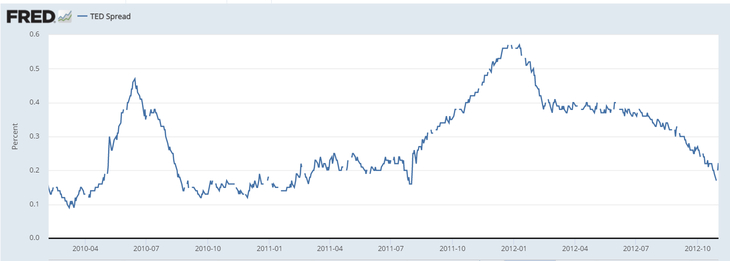

In [2]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\tedrate.jpg')

In [3]:
tedrate_data = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\TEDRATE.csv")
tedrate_data.head().append(tedrate_data.tail())

,DATE,TEDRATE
0,2010-02-05,0.15
1,2010-02-08,0.13
2,2010-02-09,0.13
3,2010-02-10,0.14
4,2010-02-11,0.14
710,2012-10-26,0.19
711,2012-10-29,0.17
712,2012-10-30,.
713,2012-10-31,0.20
714,2012-11-01,0.22


In [4]:
tedrate_data.shape

(715, 2)

**If we observe from TEDRATE dataset there are lot of missing values along with dates.**

#### Dataset: https://fred.stlouisfed.org/series/VIXCLS  (CBOE Volatility Index: VIX (VIXCLS))

#### **Categories > Money, Banking, & Finance > Financial Indicators > Volatility Indexes**

**Source: Chicago Board Options Exchange**

**Release: CBOE Market Statistics**

**Units:  Index, Not Seasonally Adjusted**

**Frequency:  Daily, Close**

**VIX measures market expectation of near term volatility conveyed by stock index option prices. Copyright, 2016, Chicago Board Options Exchange, Inc. Reprinted with permission.**

##### **Start Date: 2010-02-05; End Date: 2012-11-01**

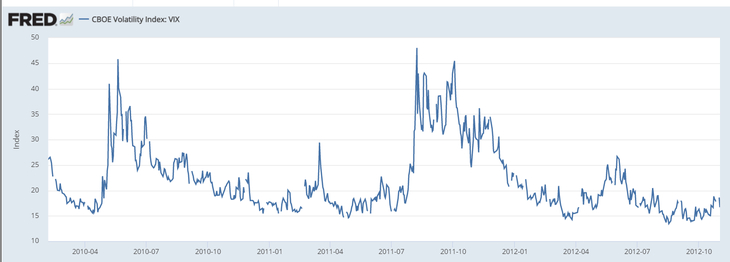

In [5]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\vixcls.jpg')

In [6]:
vixcls_data = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\VIXCLS.csv")
vixcls_data.head().append(vixcls_data.tail())

,DATE,VIXCLS
0,2010-02-05,26.11
1,2010-02-08,26.51
2,2010-02-09,26.00
3,2010-02-10,25.40
4,2010-02-11,23.96
710,2012-10-26,17.81
711,2012-10-29,.
712,2012-10-30,.
713,2012-10-31,18.60
714,2012-11-01,16.69


In [7]:
vixcls_data.shape

(715, 2)

**In VIXCLS dataset there are lot of missing values along with dates.**

#### Dataset: https://fred.stlouisfed.org/series/DGS10  (10-Year Treasury Constant Maturity Rate (DGS10))

#### **Categories > Money, Banking, & Finance > Interest Rates > Treasury Constant Maturity**

**Source: Board of Governors of the Federal Reserve System (US)**

**Release: H.15 Selected Interest Rates**

**Units:  Percent, Not Seasonally Adjusted**

**Frequency:  Daily**

**For further information regarding treasury constant maturity data, please refer to the H.15 Statistical Release notes and Treasury Yield Curve Methodology.**

##### **Start Date: 2010-02-05; End Date: 2012-11-01**

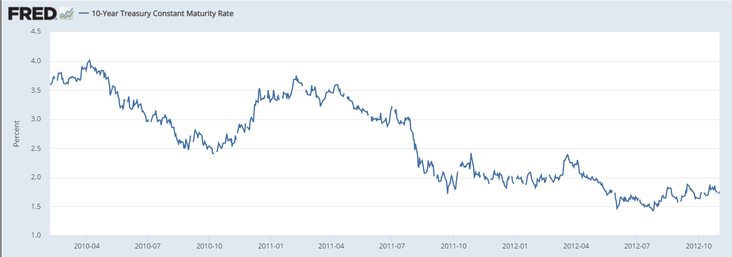

In [8]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\dgs10.jpg')

In [9]:
dgs_data = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\DGS10.csv")
dgs_data.head().append(dgs_data.tail())

,DATE,DGS10
0,2010-02-05,3.59
1,2010-02-08,3.62
2,2010-02-09,3.67
3,2010-02-10,3.72
4,2010-02-11,3.73
710,2012-10-26,1.78
711,2012-10-29,1.74
712,2012-10-30,.
713,2012-10-31,1.72
714,2012-11-01,1.75


In [10]:
dgs_data.shape

(715, 2)

**In DGS10 dataset there are lot of missing values along with dates.**

#### Dataset: https://fred.stlouisfed.org/series/VXNCLS  (CBOE NASDAQ 100 Volatility Index (VXNCLS))

**Source: Chicago Board Options Exchange**

**Release: CBOE Market Statistics**

**Units:  Index, Not Seasonally Adjusted**

**Frequency:  Daily, Close**

**Copyright, 2016, Chicago Board Options Exchange, Inc. Reprinted with permission.**

##### **Start Date: 2010-02-05; End Date: 2012-11-01**

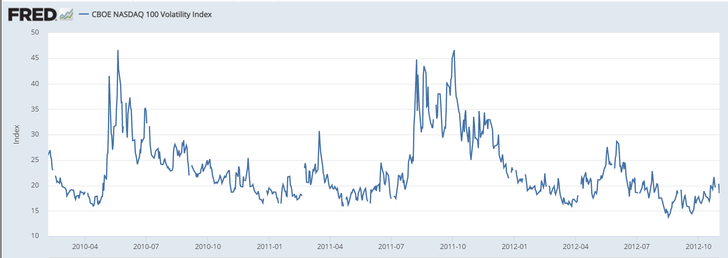

In [11]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\vxncls.jpg')

In [12]:
vxncls_data = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\VXNCLS.csv")
vxncls_data.head().append(vxncls_data.tail())

,DATE,VXNCLS
0,2010-02-05,25.96
1,2010-02-08,26.92
2,2010-02-09,25.58
3,2010-02-10,25.23
4,2010-02-11,23.43
710,2012-10-26,19.58
711,2012-10-29,.
712,2012-10-30,.
713,2012-10-31,20.33
714,2012-11-01,18.44


In [13]:
vxncls_data.shape

(715, 2)

**In VXNCLS dataset there are lot of missing values along with dates.**

#### Dataset: https://fred.stlouisfed.org/series/WLEMUINDXD  (Equity Market-related Economic Uncertainty Index (WLEMUINDXD))

**Source: Baker, Scott R.**

**Source: Bloom, Nick**

**Source: Davis, Stephen J.**

**Release: Economic Policy Uncertainty**

**Units:  Index, Not Seasonally Adjusted**

**Frequency:  Daily, 7-Day**

**For additional details, including an analysis of the performance of the model, see Baker, Scott, Nicholas Bloom and Steven Davis (2012), "Measuring Economic Policy Uncertainty"**

##### **Start Date: 2010-02-05; End Date: 2012-11-01**

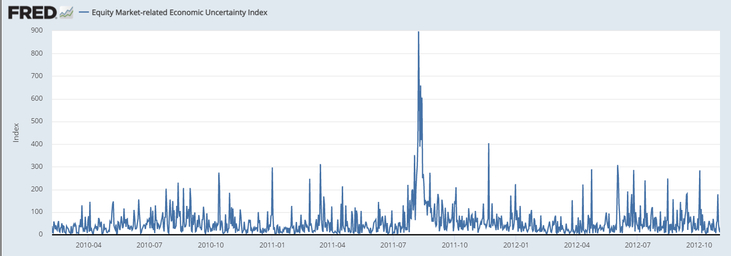

In [14]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\WLEMUINDXD.jpg')

In [15]:
WLEMUINDXD_data = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\WLEMUINDXD.csv")
WLEMUINDXD_data.head().append(WLEMUINDXD_data.tail())

,DATE,WLEMUINDXD
0,2010-02-05,37.80
1,2010-02-06,9.91
2,2010-02-07,8.31
3,2010-02-08,58.74
4,2010-02-09,45.14
996,2012-10-28,60.07
997,2012-10-29,178.68
998,2012-10-30,45.95
999,2012-10-31,21.05
1000,2012-11-01,10.88


In [16]:
WLEMUINDXD_data.shape

(1001, 2)

**In WLEMUINDXD dataset there are no missing values**

#### Dataset: https://fred.stlouisfed.org/series/USEPUINDXD  (Economic Policy Uncertainty Index for United States (USEPUINDXD))

**Source: Baker, Scott R.**

**Source: Bloom, Nick**

**Source: Davis, Stephen J.**

**Release: Economic Policy Uncertainty**

**Units:  Index, Not Seasonally Adjusted**

**Frequency:  Daily, 7-Day**

**The daily news-based Economic Policy Uncertainty Index is based on newspapers in the United States.**

**For additional details, including an analysis of the performance of the model, see Baker, Scott, Nicholas Bloom and Steven Davis (2012), "Measuring Economic Policy Uncertainty"**

##### **Start Date: 2010-02-05; End Date: 2012-11-01**

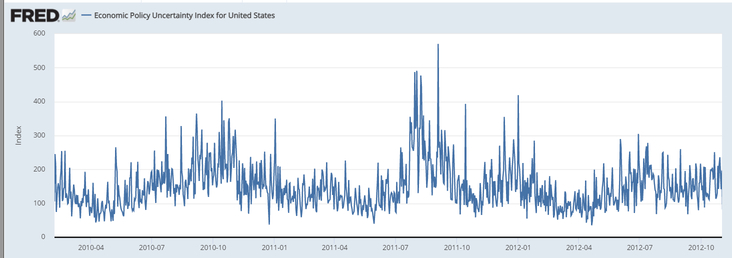

In [17]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\USEPUINDXD.jpg')

In [18]:
USEPUINDXD_data = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\USEPUINDXD.csv")
USEPUINDXD_data.head().append(USEPUINDXD_data.tail())

,DATE,USEPUINDXD
0,2010-02-05,110.40
1,2010-02-06,245.28
2,2010-02-07,215.18
3,2010-02-08,74.59
4,2010-02-09,114.63
996,2012-10-28,215.73
997,2012-10-29,235.95
998,2012-10-30,182.04
999,2012-10-31,141.64
1000,2012-11-01,196.81


In [19]:
USEPUINDXD_data.shape

(1001, 2)

**In USEPUINDXD dataset there are no missing values**

#### Converting 'DATE' into Python Date time object.

In [20]:
tedrate_data['DATE'] = pd.to_datetime(tedrate_data['DATE']) #, errors='coerce'
vixcls_data['DATE'] = pd.to_datetime(vixcls_data['DATE']) #, errors='coerce'
dgs_data['DATE'] = pd.to_datetime(dgs_data['DATE']) #, errors='coerce'
vxncls_data['DATE'] = pd.to_datetime(vxncls_data['DATE']) #, errors='coerce'
WLEMUINDXD_data['DATE'] = pd.to_datetime(WLEMUINDXD_data['DATE']) #, errors='coerce'
USEPUINDXD_data['DATE'] = pd.to_datetime(USEPUINDXD_data['DATE']) #, errors='coerce'

#### As we have seen above, few datasets having missing dates, so we are imputing the missed dates using date_range() function and filling respective date values using 'nan'

In [26]:
import datetime

TEDRATE = pd.date_range(start = tedrate_data.DATE.min(), end = tedrate_data.DATE.max())
tedrate_data = tedrate_data.set_index('DATE').reindex(TEDRATE).fillna('nan').rename_axis('DATE').reset_index()

#data.to_csv('C://Users//karth//Desktop//Timeseries_Task//1.csv', encoding='utf-8')

In [27]:
VIXCLS = pd.date_range(start = vixcls_data.DATE.min(), end = vixcls_data.DATE.max())
vixcls_data = vixcls_data.set_index('DATE').reindex(VIXCLS).fillna('nan').rename_axis('DATE').reset_index()

In [28]:
DGS10 = pd.date_range(start = dgs_data.DATE.min(), end = dgs_data.DATE.max())
dgs_data = dgs_data.set_index('DATE').reindex(DGS10).fillna('nan').rename_axis('DATE').reset_index()

In [29]:
vxncls = pd.date_range(start = vxncls_data.DATE.min(), end = vxncls_data.DATE.max())
vxncls_data = vxncls_data.set_index('DATE').reindex(vxncls).fillna('nan').rename_axis('DATE').reset_index()

**Now we can observe below by using shape of datasets after doing DATE imputation**

In [30]:
tedrate_data.shape

(1001, 2)

In [31]:
vixcls_data.shape

(1001, 2)

In [32]:
dgs_data.shape

(1001, 2)

In [33]:
vxncls_data.shape

(1001, 2)

In [34]:
tedrate_data.isnull().sum()

DATE       0
TEDRATE    0
dtype: int64

In [35]:
vixcls_data.isnull().sum()

DATE      0
VIXCLS    0
dtype: int64

In [36]:
dgs_data.isnull().sum()

DATE     0
DGS10    0
dtype: int64

In [37]:
vxncls_data.isnull().sum()

DATE      0
VXNCLS    0
dtype: int64

In [38]:
WLEMUINDXD_data.isnull().sum()

DATE          0
WLEMUINDXD    0
dtype: int64

In [39]:
USEPUINDXD_data.isnull().sum()

DATE          0
USEPUINDXD    0
dtype: int64

In [40]:
# Checking percentage of null values for each feature/column

null_values_per_variable = 100 * (tedrate_data.isnull().sum()/tedrate_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

TEDRATE    0.0
DATE       0.0
dtype: float64

In [41]:
null_values_per_variable = 100 * (vixcls_data.isnull().sum()/vixcls_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

VIXCLS    0.0
DATE      0.0
dtype: float64

In [42]:
null_values_per_variable = 100 * (dgs_data.isnull().sum()/dgs_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

DGS10    0.0
DATE     0.0
dtype: float64

In [43]:
null_values_per_variable = 100 * (vxncls_data.isnull().sum()/vxncls_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

VXNCLS    0.0
DATE      0.0
dtype: float64

In [44]:
null_values_per_variable = 100 * (WLEMUINDXD_data.isnull().sum()/WLEMUINDXD_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

WLEMUINDXD    0.0
DATE          0.0
dtype: float64

In [45]:
null_values_per_variable = 100 * (USEPUINDXD_data.isnull().sum()/USEPUINDXD_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

USEPUINDXD    0.0
DATE          0.0
dtype: float64

#### By above methodologies we are not able to observe missing values, by using value_counts() function we can see there are 'nan' values which we imputed previously and full stop (.) symbol

In [46]:
tedrate_data['TEDRATE'].value_counts()

nan     286
0.38     52
.        44
0.15     41
0.16     39
0.37     32
0.14     31
0.20     28
0.22     27
0.13     25
0.39     24
0.21     23
0.23     22
0.40     19
0.36     18
0.34     17
0.26     15
0.18     14
0.35     14
0.17     14
0.56     14
0.32     14
0.19     13
0.24     13
0.33     13
0.25     13
0.30     11
0.42     11
0.12     10
0.27      9
0.31      8
0.29      7
0.41      7
0.44      7
0.52      7
0.11      6
0.53      6
0.45      5
0.48      5
0.28      5
0.46      4
0.43      4
0.51      4
0.10      4
0.57      3
0.49      3
0.54      3
0.50      3
0.09      2
0.47      1
0.55      1
Name: TEDRATE, dtype: int64

In [47]:
vixcls_data['VIXCLS'].value_counts()

nan      286
.         24
16.62      4
15.95      4
20.63      4
        ... 
45.45      1
23.80      1
19.35      1
24.92      1
20.70      1
Name: VIXCLS, Length: 562, dtype: int64

In [48]:
dgs_data['DGS10'].value_counts()

nan     286
.        26
2.00     12
2.01     11
1.98     10
       ... 
3.98      1
3.82      1
3.96      1
2.82      1
2.46      1
Name: DGS10, Length: 225, dtype: int64

In [49]:
vxncls_data['VXNCLS'].value_counts()

nan      286
.         24
19.09      5
18.67      4
16.83      3
        ... 
20.64      1
22.32      1
15.44      1
31.06      1
19.07      1
Name: VXNCLS, Length: 565, dtype: int64

In [50]:
WLEMUINDXD_data['WLEMUINDXD'].value_counts()

23.69     3
13.56     3
16.26     2
66.77     2
9.77      2
         ..
5.70      1
108.32    1
23.18     1
28.31     1
6.00      1
Name: WLEMUINDXD, Length: 952, dtype: int64

In [51]:
USEPUINDXD_data['USEPUINDXD'].value_counts()

123.34    2
167.88    2
79.23     2
91.77     2
205.58    2
         ..
194.72    1
129.21    1
167.86    1
90.46     1
67.00     1
Name: USEPUINDXD, Length: 979, dtype: int64

#### Let's replace full stop (.) symbol into 'nan' for our convenience

In [52]:
tedrate_data['TEDRATE'] = tedrate_data['TEDRATE'].replace(".", "nan")

In [53]:
tedrate_data['TEDRATE'].value_counts()

nan     330
0.38     52
0.15     41
0.16     39
0.37     32
0.14     31
0.20     28
0.22     27
0.13     25
0.39     24
0.21     23
0.23     22
0.40     19
0.36     18
0.34     17
0.26     15
0.32     14
0.35     14
0.56     14
0.17     14
0.18     14
0.33     13
0.24     13
0.19     13
0.25     13
0.42     11
0.30     11
0.12     10
0.27      9
0.31      8
0.29      7
0.41      7
0.44      7
0.52      7
0.11      6
0.53      6
0.45      5
0.48      5
0.28      5
0.46      4
0.43      4
0.51      4
0.10      4
0.49      3
0.54      3
0.50      3
0.57      3
0.09      2
0.55      1
0.47      1
Name: TEDRATE, dtype: int64

In [54]:
vixcls_data['VIXCLS'] = vixcls_data['VIXCLS'].replace(".", "nan")

In [55]:
vixcls_data['VIXCLS'].value_counts()

nan      310
16.62      4
20.63      4
15.95      4
17.55      3
        ... 
36.91      1
45.45      1
23.80      1
19.35      1
21.97      1
Name: VIXCLS, Length: 561, dtype: int64

In [56]:
dgs_data['DGS10'] = dgs_data['DGS10'].replace(".", "nan")

In [57]:
dgs_data['DGS10'].value_counts()

nan     312
2.00     12
2.01     11
1.98     10
1.96      9
       ... 
3.98      1
2.82      1
2.65      1
3.82      1
2.46      1
Name: DGS10, Length: 224, dtype: int64

In [58]:
vxncls_data['VXNCLS'] = vxncls_data['VXNCLS'].replace(".", "nan")

In [59]:
vxncls_data['VXNCLS'].value_counts()

nan      310
19.09      5
18.67      4
17.81      3
18.65      3
        ... 
22.32      1
15.44      1
31.06      1
21.22      1
19.07      1
Name: VXNCLS, Length: 564, dtype: int64

#### Let's do imputation of 'nan' values with forward fill 

In [60]:
#data2 = data.fillna(method='ffill')
#print(data2)

tedrate_data = tedrate_data.mask(tedrate_data=='nan', None).ffill()
print(tedrate_data)

#data['TEDRATE'] = data['TEDRATE'].rolling(window=2, min_periods=2).mean()

           DATE TEDRATE
0    2010-02-05    0.15
1    2010-02-06    0.15
2    2010-02-07    0.15
3    2010-02-08    0.13
4    2010-02-09    0.13
...         ...     ...
996  2012-10-28    0.19
997  2012-10-29    0.17
998  2012-10-30    0.17
999  2012-10-31    0.20
1000 2012-11-01    0.22

[1001 rows x 2 columns]


In [61]:
vixcls_data = vixcls_data.mask(vixcls_data=='nan', None).ffill()
print(vixcls_data)

           DATE VIXCLS
0    2010-02-05  26.11
1    2010-02-06  26.11
2    2010-02-07  26.11
3    2010-02-08  26.51
4    2010-02-09  26.00
...         ...    ...
996  2012-10-28  17.81
997  2012-10-29  17.81
998  2012-10-30  17.81
999  2012-10-31  18.60
1000 2012-11-01  16.69

[1001 rows x 2 columns]


In [62]:
dgs_data = dgs_data.mask(dgs_data=='nan', None).ffill()
print(dgs_data)

           DATE DGS10
0    2010-02-05  3.59
1    2010-02-06  3.59
2    2010-02-07  3.59
3    2010-02-08  3.62
4    2010-02-09  3.67
...         ...   ...
996  2012-10-28  1.78
997  2012-10-29  1.74
998  2012-10-30  1.74
999  2012-10-31  1.72
1000 2012-11-01  1.75

[1001 rows x 2 columns]


In [63]:
vxncls_data = vxncls_data.mask(vxncls_data=='nan', None).ffill()
print(vxncls_data)

           DATE VXNCLS
0    2010-02-05  25.96
1    2010-02-06  25.96
2    2010-02-07  25.96
3    2010-02-08  26.92
4    2010-02-09  25.58
...         ...    ...
996  2012-10-28  19.58
997  2012-10-29  19.58
998  2012-10-30  19.58
999  2012-10-31  20.33
1000 2012-11-01  18.44

[1001 rows x 2 columns]


In [64]:
tedrate_data.shape

(1001, 2)

In [65]:
vixcls_data.shape

(1001, 2)

In [66]:
dgs_data.shape

(1001, 2)

In [67]:
vxncls_data.shape

(1001, 2)

In [68]:
tedrate_data.head()

,DATE,TEDRATE
0,2010-02-05,0.15
1,2010-02-06,0.15
2,2010-02-07,0.15
3,2010-02-08,0.13
4,2010-02-09,0.13


In [69]:
vixcls_data.head()

,DATE,VIXCLS
0,2010-02-05,26.11
1,2010-02-06,26.11
2,2010-02-07,26.11
3,2010-02-08,26.51
4,2010-02-09,26.00


In [70]:
dgs_data.head()

,DATE,DGS10
0,2010-02-05,3.59
1,2010-02-06,3.59
2,2010-02-07,3.59
3,2010-02-08,3.62
4,2010-02-09,3.67


In [71]:
vxncls_data.head()

,DATE,VXNCLS
0,2010-02-05,25.96
1,2010-02-06,25.96
2,2010-02-07,25.96
3,2010-02-08,26.92
4,2010-02-09,25.58


In [72]:
tedrate_data['TEDRATE'].value_counts()

0.38    77
0.15    67
0.16    59
0.37    43
0.14    41
0.23    39
0.22    37
0.40    37
0.20    37
0.21    36
0.39    36
0.13    36
0.34    25
0.36    25
0.19    24
0.26    23
0.33    22
0.17    22
0.18    21
0.56    21
0.35    20
0.24    18
0.30    17
0.25    17
0.32    17
0.42    15
0.31    14
0.12    14
0.27    11
0.44    10
0.29     9
0.41     9
0.28     9
0.53     8
0.51     8
0.11     8
0.43     8
0.57     7
0.45     7
0.48     7
0.52     7
0.49     6
0.46     6
0.54     6
0.10     6
0.50     5
0.09     2
0.47     1
0.55     1
Name: TEDRATE, dtype: int64

In [73]:
vixcls_data['VIXCLS'].value_counts()

17.47    9
16.70    8
16.14    6
17.10    6
15.87    6
        ..
26.44    1
22.54    1
15.48    1
30.57    1
41.35    1
Name: VIXCLS, Length: 560, dtype: int64

In [74]:
dgs_data['DGS10'].value_counts()

2.01    16
1.65    15
1.98    14
2.99    13
2.94    13
        ..
3.55     1
1.56     1
2.46     1
2.42     1
2.28     1
Name: DGS10, Length: 223, dtype: int64

In [75]:
vxncls_data['VXNCLS'].value_counts()

18.67    8
19.76    7
19.09    7
18.65    7
16.54    7
        ..
19.37    1
16.76    1
20.79    1
23.06    1
19.07    1
Name: VXNCLS, Length: 563, dtype: int64

#### Checking distribution of variables

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'TEDRATE')

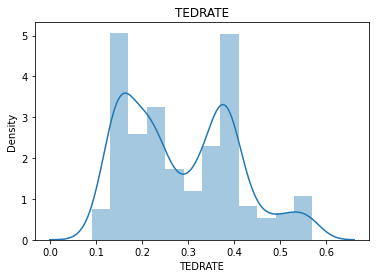

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(tedrate_data['TEDRATE'])
plt.title('TEDRATE')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'VIXCLS')

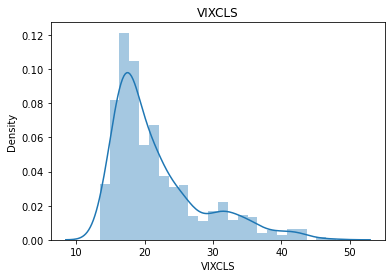

In [77]:
sns.distplot(vixcls_data['VIXCLS'])
plt.title('VIXCLS')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DGS10')

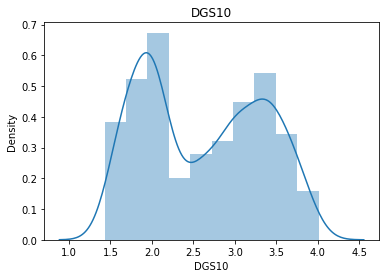

In [78]:
sns.distplot(dgs_data['DGS10'])
plt.title('DGS10')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'VXNCLS')

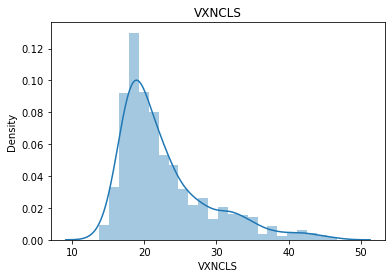

In [79]:
sns.distplot(vxncls_data['VXNCLS'])
plt.title('VXNCLS')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'WLEMUINDXD')

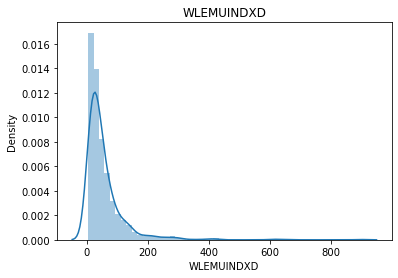

In [80]:
sns.distplot(WLEMUINDXD_data['WLEMUINDXD'])
plt.title('WLEMUINDXD')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'USEPUINDXD')

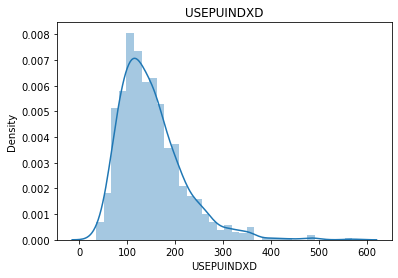

In [81]:
sns.distplot(USEPUINDXD_data['USEPUINDXD'])
plt.title('USEPUINDXD')

Text(0.5, 1.0, 'TEDRATE')

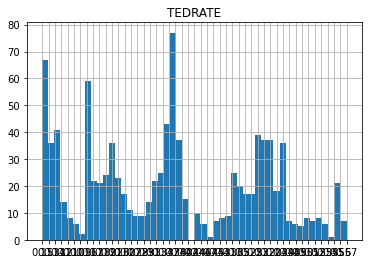

In [82]:
figure=tedrate_data.TEDRATE.hist(bins=50)
figure.set_title('TEDRATE')

#### Merging all seperate dataframes into single dataframe

In [83]:
data1 = tedrate_data.merge(vixcls_data, on='DATE', how='left')
data2 = data1.merge(dgs_data, on='DATE', how='left')
data3 = data2.merge(vxncls_data, on='DATE', how='left')
data4 = data3.merge(WLEMUINDXD_data, on='DATE', how='left')
data = data4.merge(USEPUINDXD_data, on='DATE', how='left')

In [84]:
data.head().append(data.tail())

,DATE,TEDRATE,VIXCLS,DGS10,VXNCLS,WLEMUINDXD,USEPUINDXD
0,2010-02-05,0.15,26.11,3.59,25.96,37.80,110.40
1,2010-02-06,0.15,26.11,3.59,25.96,9.91,245.28
2,2010-02-07,0.15,26.11,3.59,25.96,8.31,215.18
3,2010-02-08,0.13,26.51,3.62,26.92,58.74,74.59
4,2010-02-09,0.13,26.00,3.67,25.58,45.14,114.63
996,2012-10-28,0.19,17.81,1.78,19.58,60.07,215.73
997,2012-10-29,0.17,17.81,1.74,19.58,178.68,235.95
998,2012-10-30,0.17,17.81,1.74,19.58,45.95,182.04
999,2012-10-31,0.20,18.60,1.72,20.33,21.05,141.64
1000,2012-11-01,0.22,16.69,1.75,18.44,10.88,196.81


In [85]:
data.shape

(1001, 7)

**Converting DATE variable into datetime64[ns] datatype**

In [86]:
data.DATE = data.DATE.astype("datetime64[ns]")

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        1001 non-null   datetime64[ns]
 1   TEDRATE     1001 non-null   object        
 2   VIXCLS      1001 non-null   object        
 3   DGS10       1001 non-null   object        
 4   VXNCLS      1001 non-null   object        
 5   WLEMUINDXD  1001 non-null   float64       
 6   USEPUINDXD  1001 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 62.6+ KB


#### Converting object datatype variables into float datatype

In [88]:
data['TEDRATE'] = data['TEDRATE'].astype(str).astype(float)
data['VIXCLS'] = data['VIXCLS'].astype(str).astype(float)
data['DGS10'] = data['DGS10'].astype(str).astype(float)
data['VXNCLS'] = data['VXNCLS'].astype(str).astype(float)

In [89]:
data = pd.DataFrame(data)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        1001 non-null   datetime64[ns]
 1   TEDRATE     1001 non-null   float64       
 2   VIXCLS      1001 non-null   float64       
 3   DGS10       1001 non-null   float64       
 4   VXNCLS      1001 non-null   float64       
 5   WLEMUINDXD  1001 non-null   float64       
 6   USEPUINDXD  1001 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 62.6 KB


In [91]:
data.shape

(1001, 7)

In [93]:
data.head()

,DATE,TEDRATE,VIXCLS,DGS10,VXNCLS,WLEMUINDXD,USEPUINDXD
0,2010-02-05,0.15,26.11,3.59,25.96,37.80,110.40
1,2010-02-06,0.15,26.11,3.59,25.96,9.91,245.28
2,2010-02-07,0.15,26.11,3.59,25.96,8.31,215.18
3,2010-02-08,0.13,26.51,3.62,26.92,58.74,74.59
4,2010-02-09,0.13,26.00,3.67,25.58,45.14,114.63


### Resampling Daily data into Weekly data

In [94]:
data = data.set_index("DATE").resample('W').mean()

data.head().append(data.tail())

,TEDRATE,VIXCLS,DGS10,VXNCLS,WLEMUINDXD,USEPUINDXD
DATE,,,,,,
2010-02-07,0.150000,26.110000,3.590000,25.960000,18.673333,190.286667
2010-02-14,0.141429,24.294286,3.687143,24.295714,37.428571,128.540000
2010-02-21,0.145714,21.055714,3.745714,21.338571,29.824286,173.397143
2010-02-28,0.125714,20.025714,3.665714,20.352857,24.725714,130.768571
2010-03-07,0.107143,18.304286,3.648571,18.758571,17.844286,118.127143
2012-10-07,0.251429,15.000000,1.695714,16.842857,97.480000,154.362857
2012-10-14,0.232857,15.968571,1.711429,18.102857,21.544286,126.760000
2012-10-21,0.220000,15.967143,1.787143,18.481429,40.064286,199.952857
2012-10-28,0.200000,17.904286,1.802857,20.078571,38.321429,155.067143


In [95]:
data.shape

(144, 6)

#### Plotting and observing each variable visually to see any trend, seasonality

<AxesSubplot:>

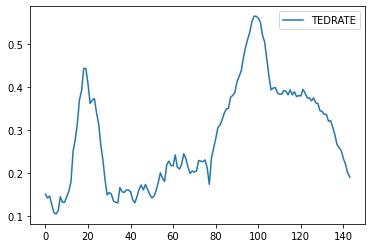

In [96]:
data = data.reset_index() # to get the indexes back to 0, 1, 2,etc.
data1 = data[['TEDRATE']]
data1.plot()

<AxesSubplot:>

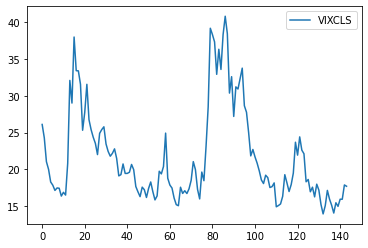

In [97]:
data2 = data[['VIXCLS']]
data2.plot()

<AxesSubplot:>

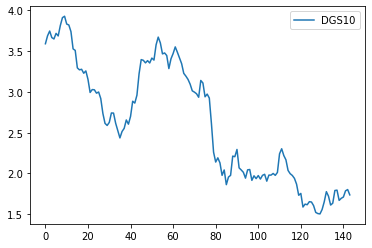

In [98]:
data3 = data[['DGS10']]
data3.plot()

<AxesSubplot:>

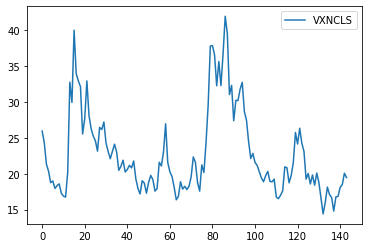

In [99]:
data4 = data[['VXNCLS']] 
data4.plot()

<AxesSubplot:>

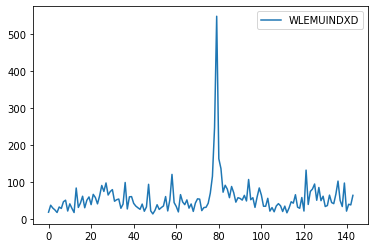

In [100]:
data5 = data[['WLEMUINDXD']] 
data5.plot()

<AxesSubplot:>

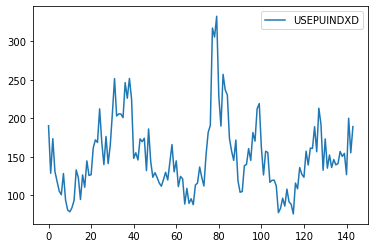

In [101]:
data6 = data[['USEPUINDXD']] 
data6.plot()

**Clearly by visually we can see that there is trend and sesonality present in these variables, so let's perform first order differentiation to eliminate these components**

<AxesSubplot:>

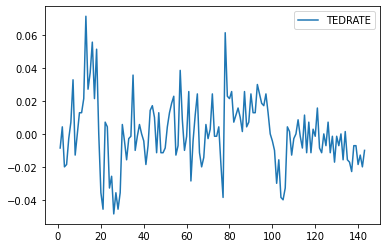

In [102]:
# This is for reducing trend and seasonality

tedrate_first_diff = data1 - data1.shift(1) # Shifting by 1 i.e., t-1

#tedrate_first_diff = tedrate_first_diff.dropna(inplace = False) # Dropping NaN values in our data

tedrate_first_diff.plot()

<AxesSubplot:>

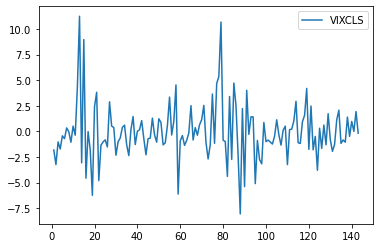

In [103]:
# This is for reducing trend and seasonality

vixcls_first_diff = data2 - data2.shift(1) # Shifting by 1 i.e., t-1

#vixcls_first_diff = vixcls_first_diff.dropna(inplace = False) # Dropping NaN values in our data

vixcls_first_diff.plot()

<AxesSubplot:>

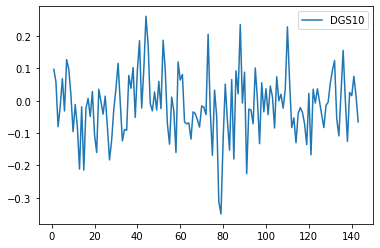

In [104]:
# This is for reducing trend and seasonality

dgs10_first_diff = data3 - data3.shift(1) # Shifting by 1 i.e., t-1

#dgs10_first_diff = dgs10_first_diff.dropna(inplace = False) # Dropping NaN values in our data

dgs10_first_diff.plot()

<AxesSubplot:>

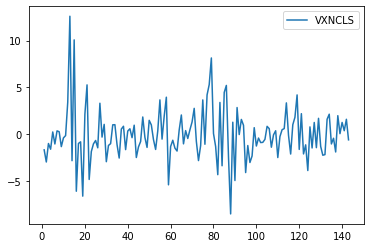

In [105]:
vxncls_first_diff = data4 - data4.shift(1) # Shifting by 1 i.e., t-1

#vxncls_first_diff = vxncls_first_diff.dropna(inplace = False) # Dropping NaN values in our data

vxncls_first_diff.plot()

<AxesSubplot:>

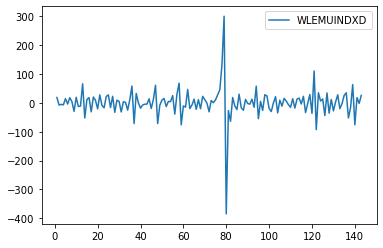

In [106]:
wlemuindxd_first_diff = data5 - data5.shift(1) # Shifting by 1 i.e., t-1

#wlemuindxd_first_diff = wlemuindxd_first_diff.dropna(inplace = False) # Dropping NaN values in our data

wlemuindxd_first_diff.plot()

<AxesSubplot:>

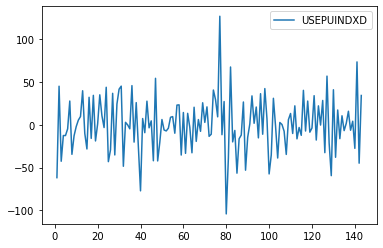

In [107]:
usepuindxd_first_diff = data6 - data6.shift(1) # Shifting by 1 i.e., t-1

#usepuindxd_first_diff = usepuindxd_first_diff.dropna(inplace = False) # Dropping NaN values in our data

usepuindxd_first_diff.plot()

#### Creating new variables in dataframe of newly created features

In [108]:
data['tedrate_first_diff'] = tedrate_first_diff
data['vixcls_first_diff'] = vixcls_first_diff
data['dgs10_first_diff'] = dgs10_first_diff
data['vxncls_first_diff'] = vxncls_first_diff
data['wlemuindxd_first_diff'] = wlemuindxd_first_diff
data['usepuindxd_first_diff'] = usepuindxd_first_diff

In [109]:
data.head()

,DATE,TEDRATE,VIXCLS,DGS10,VXNCLS,WLEMUINDXD,USEPUINDXD,tedrate_first_diff,vixcls_first_diff,dgs10_first_diff,vxncls_first_diff,wlemuindxd_first_diff,usepuindxd_first_diff
0,2010-02-07,0.150000,26.110000,3.590000,25.960000,18.673333,190.286667,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-14,0.141429,24.294286,3.687143,24.295714,37.428571,128.540000,-0.008571,-1.815714,0.097143,-1.664286,18.755238,-61.746667
2,2010-02-21,0.145714,21.055714,3.745714,21.338571,29.824286,173.397143,0.004286,-3.238571,0.058571,-2.957143,-7.604286,44.857143
3,2010-02-28,0.125714,20.025714,3.665714,20.352857,24.725714,130.768571,-0.020000,-1.030000,-0.080000,-0.985714,-5.098571,-42.628571
4,2010-03-07,0.107143,18.304286,3.648571,18.758571,17.844286,118.127143,-0.018571,-1.721429,-0.017143,-1.594286,-6.881429,-12.641429


**Dropping existing features**

In [110]:
data = data.drop(columns=['TEDRATE', 'VIXCLS','DGS10','VXNCLS', 'WLEMUINDXD','USEPUINDXD'])

In [111]:
data.head()

,DATE,tedrate_first_diff,vixcls_first_diff,dgs10_first_diff,vxncls_first_diff,wlemuindxd_first_diff,usepuindxd_first_diff
0,2010-02-07,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-14,-0.008571,-1.815714,0.097143,-1.664286,18.755238,-61.746667
2,2010-02-21,0.004286,-3.238571,0.058571,-2.957143,-7.604286,44.857143
3,2010-02-28,-0.020000,-1.030000,-0.080000,-0.985714,-5.098571,-42.628571
4,2010-03-07,-0.018571,-1.721429,-0.017143,-1.594286,-6.881429,-12.641429


**Performing backward fill of missing values**

In [112]:
data['tedrate_first_diff'] = data['tedrate_first_diff'].fillna(method='bfill')
data['vixcls_first_diff'] = data['vixcls_first_diff'].fillna(method='bfill')
data['dgs10_first_diff'] = data['dgs10_first_diff'].fillna(method='bfill')
data['vxncls_first_diff'] = data['vxncls_first_diff'].fillna(method='bfill')
data['wlemuindxd_first_diff'] = data['wlemuindxd_first_diff'].fillna(method='bfill')
data['usepuindxd_first_diff'] = data['usepuindxd_first_diff'].fillna(method='bfill')

In [113]:
data.head().append(data.tail())

,DATE,tedrate_first_diff,vixcls_first_diff,dgs10_first_diff,vxncls_first_diff,wlemuindxd_first_diff,usepuindxd_first_diff
0,2010-02-07,-0.008571,-1.815714,0.097143,-1.664286,18.755238,-61.746667
1,2010-02-14,-0.008571,-1.815714,0.097143,-1.664286,18.755238,-61.746667
2,2010-02-21,0.004286,-3.238571,0.058571,-2.957143,-7.604286,44.857143
3,2010-02-28,-0.020000,-1.030000,-0.080000,-0.985714,-5.098571,-42.628571
4,2010-03-07,-0.018571,-1.721429,-0.017143,-1.594286,-6.881429,-12.641429
139,2012-10-07,-0.007143,-0.488571,0.025714,0.062857,63.507143,4.020000
140,2012-10-14,-0.018571,0.968571,0.015714,1.260000,-75.935714,-27.602857
141,2012-10-21,-0.012857,-0.001429,0.075714,0.378571,18.520000,73.192857
142,2012-10-28,-0.020000,1.937143,0.015714,1.597143,-1.742857,-44.885714
143,2012-11-04,-0.010000,-0.176786,-0.065357,-0.596071,25.818571,34.042857


**I am dropping last row because to fit to my original data i.e., 'Weekly_Sales' feature in Walmart dataset**

In [114]:
#data = data.reset_index() # to get the indexes back to 0, 1, 2,etc.
data = data.drop(data.index[len(data)-1])

In [115]:
data.shape

(143, 7)

**Renaming DATE column for my convenience**

In [116]:
data.rename(columns = {'DATE':'Date'}, inplace = True)

In [117]:
# Setting 'Date' as index
data = data.set_index("Date")

data.head().append(data.tail())

,tedrate_first_diff,vixcls_first_diff,dgs10_first_diff,vxncls_first_diff,wlemuindxd_first_diff,usepuindxd_first_diff
Date,,,,,,
2010-02-07,-0.008571,-1.815714,0.097143,-1.664286,18.755238,-61.746667
2010-02-14,-0.008571,-1.815714,0.097143,-1.664286,18.755238,-61.746667
2010-02-21,0.004286,-3.238571,0.058571,-2.957143,-7.604286,44.857143
2010-02-28,-0.020000,-1.030000,-0.080000,-0.985714,-5.098571,-42.628571
2010-03-07,-0.018571,-1.721429,-0.017143,-1.594286,-6.881429,-12.641429
2012-09-30,-0.007143,1.394286,-0.125714,1.982857,-16.425714,-6.464286
2012-10-07,-0.007143,-0.488571,0.025714,0.062857,63.507143,4.020000
2012-10-14,-0.018571,0.968571,0.015714,1.260000,-75.935714,-27.602857
2012-10-21,-0.012857,-0.001429,0.075714,0.378571,18.520000,73.192857


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-07 to 2012-10-28
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tedrate_first_diff     143 non-null    float64
 1   vixcls_first_diff      143 non-null    float64
 2   dgs10_first_diff       143 non-null    float64
 3   vxncls_first_diff      143 non-null    float64
 4   wlemuindxd_first_diff  143 non-null    float64
 5   usepuindxd_first_diff  143 non-null    float64
dtypes: float64(6)
memory usage: 7.8 KB


In [119]:
# Resetting 'Date' index
data = data.reset_index()

In [120]:
# I am loading pre-processed weekly based features 
# Notebook can be found here: weeklydata-exogenousVariables.ipynb

df1 = pd.read_csv(r"C://Users//karth//Desktop//Timeseries_Task//weekly.csv")
df1.head().append(df1.tail())

,Date,CCSA_first_diff,ICSA_first_diff
0,2010-02-07,-23000.0,23000.0
1,2010-02-14,-23000.0,23000.0
2,2010-02-21,-48000.0,11000.0
3,2010-02-28,-12000.0,-12000.0
4,2010-03-07,11000.0,-16000.0
138,2012-09-30,1000.0,-1000.0
139,2012-10-07,-14000.0,-26000.0
140,2012-10-14,7000.0,36000.0
141,2012-10-21,-17000.0,-12000.0
142,2012-10-28,-62000.0,-10000.0


In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             143 non-null    object 
 1   CCSA_first_diff  143 non-null    float64
 2   ICSA_first_diff  143 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


**Final merge of two separate dataframe into single one**

In [122]:
data.Date = data.Date.astype("datetime64[ns]")
df1.Date = df1.Date.astype("datetime64[ns]")

In [123]:
final = data.merge(df1, on='Date', how='left')

final.head().append(final.tail())

,Date,tedrate_first_diff,vixcls_first_diff,dgs10_first_diff,vxncls_first_diff,wlemuindxd_first_diff,usepuindxd_first_diff,CCSA_first_diff,ICSA_first_diff
0,2010-02-07,-0.008571,-1.815714,0.097143,-1.664286,18.755238,-61.746667,-23000.0,23000.0
1,2010-02-14,-0.008571,-1.815714,0.097143,-1.664286,18.755238,-61.746667,-23000.0,23000.0
2,2010-02-21,0.004286,-3.238571,0.058571,-2.957143,-7.604286,44.857143,-48000.0,11000.0
3,2010-02-28,-0.020000,-1.030000,-0.080000,-0.985714,-5.098571,-42.628571,-12000.0,-12000.0
4,2010-03-07,-0.018571,-1.721429,-0.017143,-1.594286,-6.881429,-12.641429,11000.0,-16000.0
138,2012-09-30,-0.007143,1.394286,-0.125714,1.982857,-16.425714,-6.464286,1000.0,-1000.0
139,2012-10-07,-0.007143,-0.488571,0.025714,0.062857,63.507143,4.020000,-14000.0,-26000.0
140,2012-10-14,-0.018571,0.968571,0.015714,1.260000,-75.935714,-27.602857,7000.0,36000.0
141,2012-10-21,-0.012857,-0.001429,0.075714,0.378571,18.520000,73.192857,-17000.0,-12000.0
142,2012-10-28,-0.020000,1.937143,0.015714,1.597143,-1.742857,-44.885714,-62000.0,-10000.0


#### Let's check the stationarity of each variable in the dataframe

In [124]:
# Function to test the stationarity

# If the ‘Test Statistic’ is greater than the ‘Critical Value’ than the time series is stationary

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('\nResults of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('\np-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('\np-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

-----------VXNCLS----------


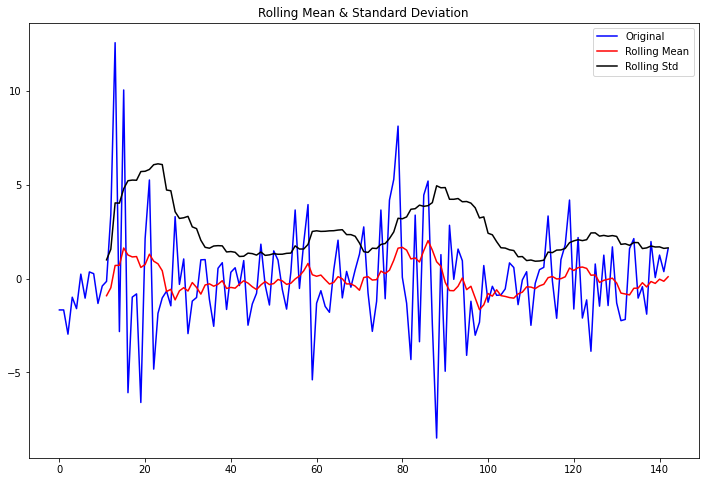


Results of Dickey-Fuller Test:

p-value = 0.0023. The series is likely stationary.
Test Statistic                  -3.871506
p-value                          0.002255
#Lags Used                       8.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64
---------------------------------------------------------------------------------------------------------
-----------WLEMUINDXD----------


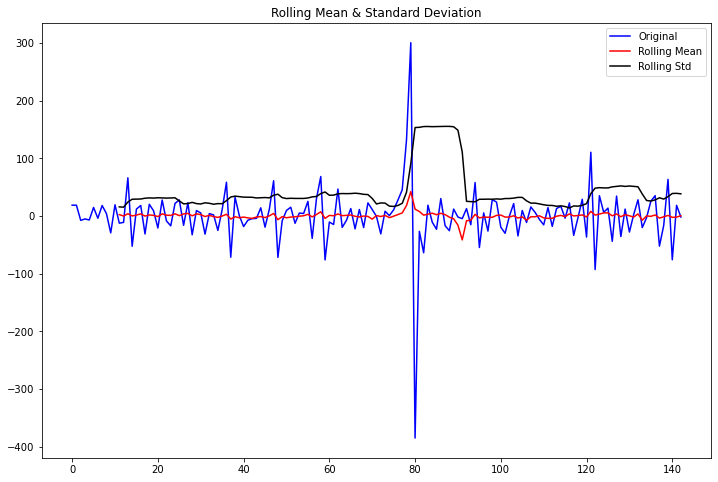


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.372594e+00
p-value                        7.309422e-16
#Lags Used                     2.000000e+00
Number of Observations Used    1.400000e+02
Critical Value (1%)           -3.477945e+00
Critical Value (5%)           -2.882416e+00
Critical Value (10%)          -2.577902e+00
dtype: float64
---------------------------------------------------------------------------------------------------------
-----------USEPUINDXD----------


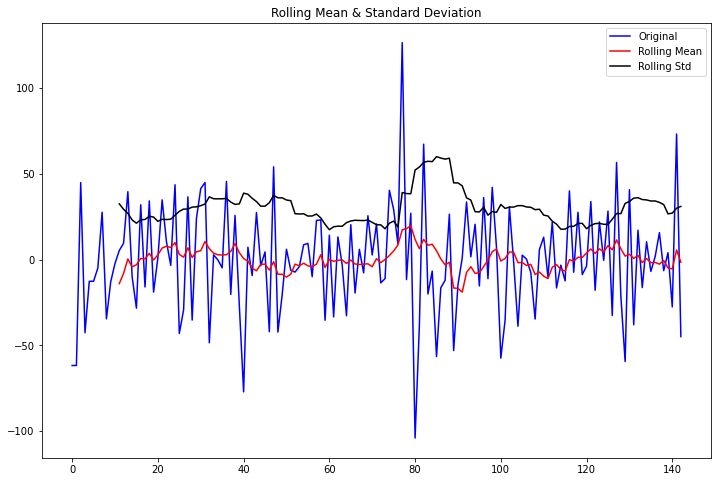


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.514846e+01
p-value                        6.851216e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64
---------------------------------------------------------------------------------------------------------
-----------TEDRATE----------


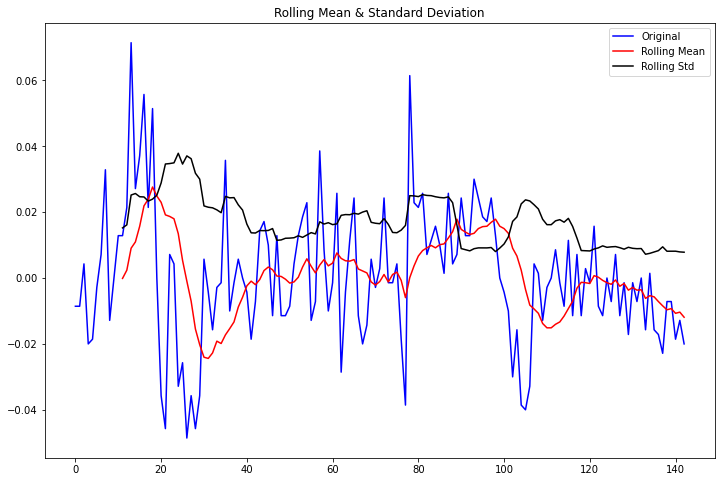


Results of Dickey-Fuller Test:

p-value = 0.0055. The series is likely stationary.
Test Statistic                  -3.612840
p-value                          0.005520
#Lags Used                       3.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64
---------------------------------------------------------------------------------------------------------
-----------VIXCLS----------


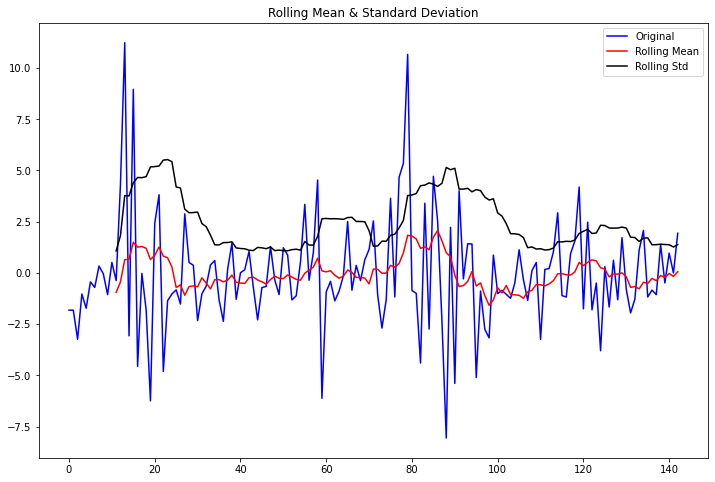


Results of Dickey-Fuller Test:

p-value = 0.0015. The series is likely stationary.
Test Statistic                  -3.986133
p-value                          0.001485
#Lags Used                       8.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64
---------------------------------------------------------------------------------------------------------
-----------DGS10----------


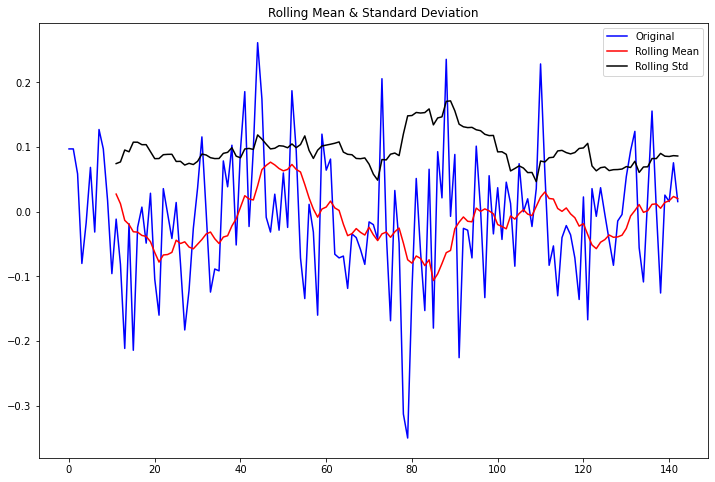


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.389004e+00
p-value                        6.638884e-16
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64
---------------------------------------------------------------------------------------------------------
-----------CCSA----------


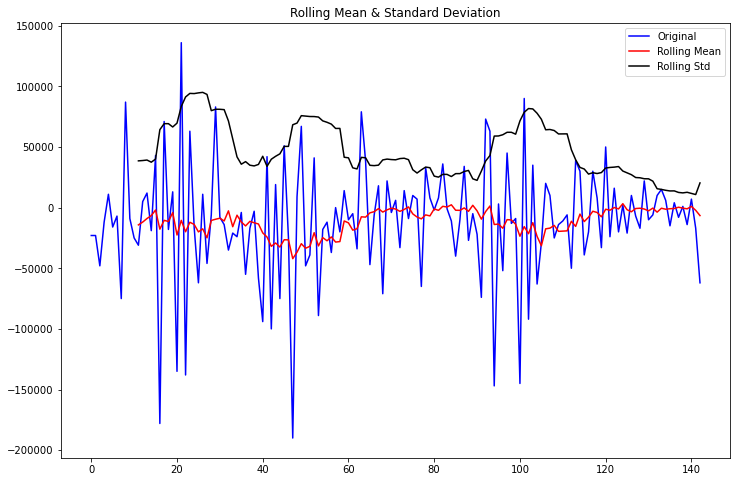


Results of Dickey-Fuller Test:

p-value = 0.0067. The series is likely stationary.
Test Statistic                  -3.553701
p-value                          0.006710
#Lags Used                       5.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64
---------------------------------------------------------------------------------------------------------
-----------ICSA----------


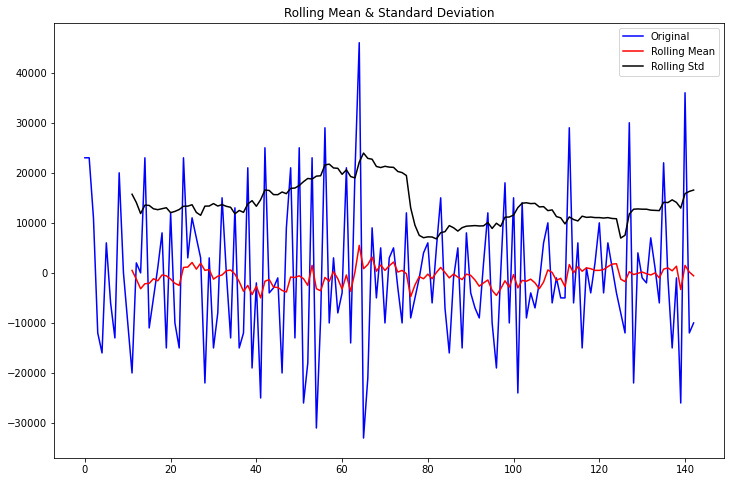


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.440120e+00
p-value                        4.920481e-16
#Lags Used                     3.000000e+00
Number of Observations Used    1.390000e+02
Critical Value (1%)           -3.478294e+00
Critical Value (5%)           -2.882568e+00
Critical Value (10%)          -2.577983e+00
dtype: float64


In [125]:
# Testing stationarity

print("-----------VXNCLS----------")
test_stationarity(final['vxncls_first_diff'])
print('---'*35)
print("-----------WLEMUINDXD----------")
test_stationarity(final['wlemuindxd_first_diff'])
print('---'*35)
print("-----------USEPUINDXD----------")
test_stationarity(final['usepuindxd_first_diff'])
print('---'*35)
print("-----------TEDRATE----------")
test_stationarity(final['tedrate_first_diff'])
print('---'*35)
print("-----------VIXCLS----------")
test_stationarity(final['vixcls_first_diff'])
print('---'*35)
print("-----------DGS10----------")
test_stationarity(final['dgs10_first_diff'])
print('---'*35)
print("-----------CCSA----------")
test_stationarity(final['CCSA_first_diff'])
print('---'*35)
print("-----------ICSA----------")
test_stationarity(final['ICSA_first_diff'])

**Save**

In [126]:
#final.to_csv('C://Users//karth//Desktop//Timeseries_Task//exog_withdiff_2.csv', encoding='utf-8' ,index=False)

In [127]:
## Checking can we merge weekly_sales data with exogenous variables data

In [128]:
# df1 = pd.read_csv('C://Users//karth//Desktop//Timeseries_Task//data1.csv')
# df2 = pd.read_csv('C://Users//karth//Desktop//Timeseries_Task//exog.csv')
# df2.columns = ['Date', 'TEDRATE','VIXCLS','DGS10','CCSA','ICSA']
# dataaa = df1.merge(df2, on='Date', how='left')
# dataaa